In [2]:
#!pip install skits 

In [3]:
import numpy as np
from skits.preprocessing import DifferenceTransformer
y = np.random.random(10)
# scikit-learn expects 2D design matrices,
# so we duplicate the time series.
X = y[:, np.newaxis] 

dt = DifferenceTransformer(period=3)

Xt = dt.fit_transform(X,y)
X_inv = dt.inverse_transform(Xt) # invert transform to original data

assert np.allclose(X, X_inv)
Xt

array([[        nan],
       [        nan],
       [        nan],
       [ 0.07627544],
       [ 0.10946357],
       [-0.72896638],
       [-0.40784805],
       [ 0.36697201],
       [ 0.66270108],
       [-0.18274833]])

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

from skits.pipeline import ForecasterPipeline
from skits.preprocessing import ReversibleImputer
from skits.feature_extraction import (AutoregressiveTransformer, 
                                      SeasonalTransformer)
                               
steps = [
    ('pre_scaling', StandardScaler()),
    ('features', FeatureUnion([
        ('ar_transformer', AutoregressiveTransformer(num_lags=3)),
        ('seasonal_transformer', SeasonalTransformer(seasonal_period=20)
    )])),
    ('post_features_imputer', ReversibleImputer()),
    ('regressor', LinearRegression(fit_intercept=False))
]
                               
l = np.linspace(0, 1, 101)
y = 5*np.sin(2 * np.pi * 5 * l) + np.random.normal(0, 1, size=101)
X = y[:, np.newaxis]

pipeline = ForecasterPipeline(steps)

pipeline.fit(X, y)
y_pred = pipeline.predict(X, to_scale=True, refit=True)
print(X)
print(y)

[[-0.18358454]
 [ 1.49356651]
 [ 3.54607672]
 [ 3.88478859]
 [ 6.3129395 ]
 [ 5.92754526]
 [ 3.91979701]
 [ 4.46700971]
 [ 2.81688222]
 [ 2.2622607 ]
 [ 0.77772887]
 [-0.69271179]
 [-2.28918507]
 [-5.54057622]
 [-3.68023379]
 [-5.65491681]
 [-4.23438566]
 [-4.61902254]
 [-3.095812  ]
 [-2.17889014]
 [-0.34918431]
 [ 2.51051349]
 [ 2.23089608]
 [ 4.6112833 ]
 [ 5.70531216]
 [ 4.09344279]
 [ 3.82715811]
 [ 5.62681951]
 [ 3.18365826]
 [ 0.59716728]
 [-1.14940073]
 [-2.7943581 ]
 [-1.68692268]
 [-2.48127208]
 [-4.59298043]
 [-4.85335687]
 [-5.52645001]
 [-5.08435231]
 [-2.37544082]
 [-2.00615377]
 [-0.68953648]
 [ 1.06075343]
 [ 2.52039666]
 [ 4.80326843]
 [ 4.24636959]
 [ 5.20509008]
 [ 5.03419041]
 [ 3.79844164]
 [ 4.1503751 ]
 [ 2.47931561]
 [-1.3408983 ]
 [-0.57712678]
 [-2.84052775]
 [-5.99956418]
 [-4.7778454 ]
 [-5.22410403]
 [-5.45339486]
 [-3.33324837]
 [-3.49349806]
 [ 0.35643518]
 [ 0.69656444]
 [ 0.9124758 ]
 [ 2.91971871]
 [ 5.46975771]
 [ 5.08922072]
 [ 4.03717434]
 [ 4.79504

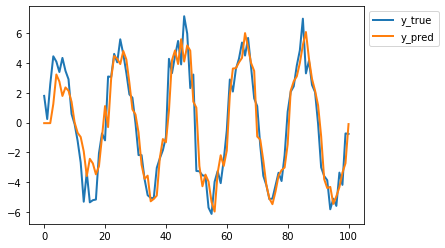

In [5]:
import matplotlib.pyplot as plt

plt.plot(y, lw=2)
plt.plot(y_pred, lw=2)
plt.legend(['y_true', 'y_pred'], bbox_to_anchor=(1, 1));

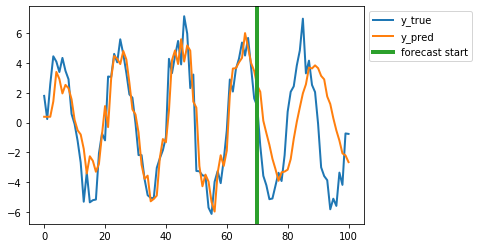

In [6]:
start_idx = 70
plt.plot(y, lw=2);
plt.plot(pipeline.forecast(y[:, np.newaxis], start_idx=start_idx), lw=2);
ax = plt.gca();
ylim = ax.get_ylim();
plt.plot((start_idx, start_idx), ylim, lw=4);
plt.ylim(ylim);
plt.legend(['y_true', 'y_pred', 'forecast start'], bbox_to_anchor=(1, 1));

In [7]:
# Another example but with covid cases in baltimore county
import pandas as pd
COVID_counties_df=pd.read_csv('us_counties_covid19_daily.csv')
del COVID_counties_df['fips']
COVID_baltimore_df=COVID_counties_df[COVID_counties_df['county']=='Baltimore']
COVID_baltimore_df

,date,county,state,cases,deaths
1249,3/11/2020,Baltimore,Maryland,1,0
1467,3/12/2020,Baltimore,Maryland,1,0
1745,3/13/2020,Baltimore,Maryland,2,0
2085,3/14/2020,Baltimore,Maryland,3,0
2484,3/15/2020,Baltimore,Maryland,3,0
...,...,...,...,...,...
558340,9/22/2020,Baltimore,Maryland,17546,619
561577,9/23/2020,Baltimore,Maryland,17603,621
564817,9/24/2020,Baltimore,Maryland,17678,621
568057,9/25/2020,Baltimore,Maryland,17743,622


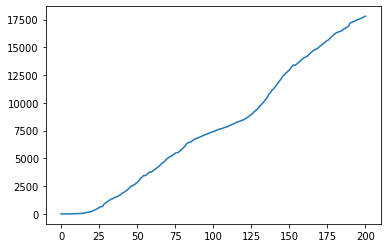

In [8]:
plt.plot(np.linspace(0,len(COVID_baltimore_df['cases']),len(COVID_baltimore_df['cases'])),COVID_baltimore_df['cases'])

In [34]:
steps = [
    ('pre_scaling', StandardScaler()),
    ('features', FeatureUnion([
        ('ar_transformer', AutoregressiveTransformer(num_lags=3)),
        ('seasonal_transformer', SeasonalTransformer(seasonal_period=20)
    )])),
    ('post_features_imputer', ReversibleImputer()),
    ('regressor', LinearRegression(fit_intercept=False))
]
                               
y = np.array(COVID_baltimore_df['cases'])
X = y[:, np.newaxis]

pipeline = ForecasterPipeline(steps)

pipeline.fit(X, y)
y_pred = pipeline.predict(X, to_scale=True, refit=True)

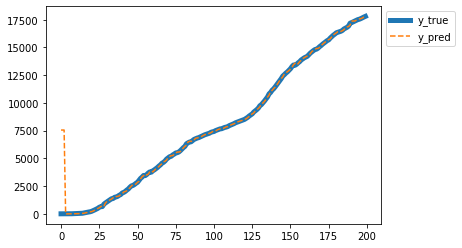

In [42]:
plt.plot(y, lw=5)
plt.plot(y_pred, '--')
plt.legend(['y_true', 'y_pred'], bbox_to_anchor=(1, 1));